In [821]:
import pandas as pd
import os
import numpy as np

import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mutual_info_score


# Plotting
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


Since there were no column headers in either excel file, I manually added the column names from the metadata.txt file. There were some extra names in the metadata file which were not present in the csv files, and the order did not exactly match across the metadata.txt and csv files. Therefore, I used the additional information provided in metadata (the number of unique values in each column) and used that to ensure I had the proper column name mapped to each column. I performed this manually in excel.

In [822]:
learn = pd.read_csv("census_income_learn.csv")

In [823]:
learn.shape

(199523, 42)

In [824]:
test = pd.read_csv("census_income_test.csv")

In [825]:
test.shape

(99762, 42)

In [826]:
test.head()

,age,class_worker,industry_code,occupation_code,education,wage_hour,enrolled_edu,marital_status,maj_industry,maj_occupation,...,father_birthplace,mother_birthplace,self_birthplace,citizenship,own_business,fill_inc_questionnaire,veterans_benefits,weeks_worked,year,dep_var
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


## Data Cleaning

In [827]:
learn.head()

,age,class_worker,industry_code,occupation_code,education,wage_hour,enrolled_edu,marital_status,maj_industry,maj_occupation,...,father_birthplace,mother_birthplace,self_birthplace,citizenship,own_business,fill_inc_questionnaire,veterans_benefits,weeks_worked,year,dep_var
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [828]:
# Drop the "weight" column since we do not need that
learn.drop('weight', axis = 1, inplace=True)

We check the number of duplicated rows (where every column is the same across the entire row).

In [829]:
duplicated_learn = learn[learn.duplicated()]
duplicated_test = test[test.duplicated()]

In [830]:
# Remove duplicate rows in both dataframes
learn.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [831]:
# Check if duplicate removal worked
learn[learn.duplicated()]


,age,class_worker,industry_code,occupation_code,education,wage_hour,enrolled_edu,marital_status,maj_industry,maj_occupation,...,father_birthplace,mother_birthplace,self_birthplace,citizenship,own_business,fill_inc_questionnaire,veterans_benefits,weeks_worked,year,dep_var


In [832]:
test[test.duplicated()]

,age,class_worker,industry_code,occupation_code,education,wage_hour,enrolled_edu,marital_status,maj_industry,maj_occupation,...,father_birthplace,mother_birthplace,self_birthplace,citizenship,own_business,fill_inc_questionnaire,veterans_benefits,weeks_worked,year,dep_var


In [833]:
learn.marital_status.value_counts()

 Married-civilian spouse present    77842
 Never married                      48073
 Divorced                           12504
 Widowed                             8873
 Separated                           3430
 Married-spouse absent               1516
 Married-A F spouse present           658
Name: marital_status, dtype: int64

We now remove certain rows (such as where the age is zero and the marital status is married)

In [834]:
learn = learn.loc[~((learn['age'] == 0) & (learn['marital_status'].str.strip()  == 'Married-civilian spouse present'))]
test = test.loc[~((test['age'] == 0) & (test['marital_status'].str.strip()  == 'Married-civilian spouse present'))]

In [835]:
# We stack the test and learning datasets to check for rows which are present in both datasets, and drop them.
merged = pd.concat([learn, test])

In [836]:
merged[merged.duplicated()]

,age,class_worker,industry_code,occupation_code,education,wage_hour,enrolled_edu,marital_status,maj_industry,maj_occupation,...,mother_birthplace,self_birthplace,citizenship,own_business,fill_inc_questionnaire,veterans_benefits,weeks_worked,year,dep_var,weight


There are no rows which are present in both the training and testing datasets.

Check NAs / missing values

In [837]:
print(learn.isna().sum().max())
print(test.isna().sum().max())

0
0


No missing values in either dataset. Next, we check for zeroes in each column across both datasets. 

In [838]:
learn.eq(0).sum()[learn.eq(0).sum() != 0].sort_values(ascending=False)

cap_loss                           148990
cap_gains                          145521
wage_hour                          141593
own_business                       134071
dividends                          131815
industry_code                       54547
occupation_code                     54547
num persons worked for employer     49984
weeks_worked                        49984
veterans_benefits                   12697
age                                   660
dtype: int64

In [839]:
test.eq(0).sum()[test.eq(0).sum() != 0].sort_values(ascending=False)

cap_loss                           96970
cap_gains                          95156
wage_hour                          93294
own_business                       89304
dividends                          88350
industry_code                      49402
occupation_code                    49402
num persons worked for employer    47008
weeks_worked                       47008
veterans_benefits                  22596
age                                 1357
dtype: int64

Some of these zeroes are expected, such as for categorical features (veterans benefits, own_business, industry_code, occupation_code). The 660 zeroes in age are also expected, since that could be newbors in the dataset, as well as number of persons worked for employer, since a self employed person might have zero in that category.   

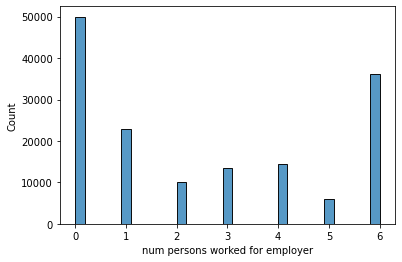

In [840]:
sns.histplot(x='num persons worked for employer', data=learn)
plt.show()

In [841]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, ggtitle, geom_histogram, stat_bin

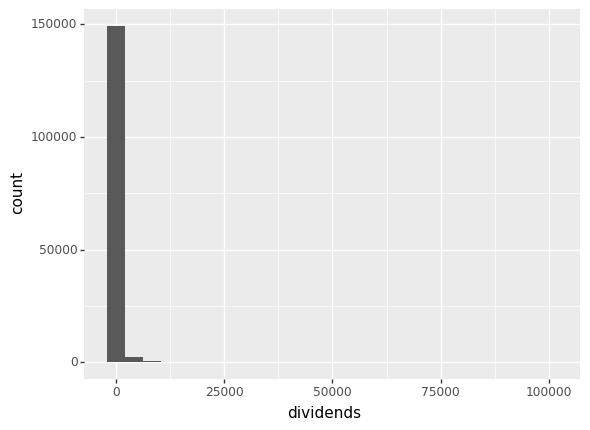

<ggplot: (135578044404)>

In [842]:
(
    ggplot(learn) + 
    aes(x = 'dividends') + 
    geom_histogram(bins = 25)
)

As most values for dividends, capital gains, capital losses, and wage per hour are zero, it might be beneficial to apply some kind of transformation (log) to the data, or to convert them to binary categorical variables (1 if > 0).

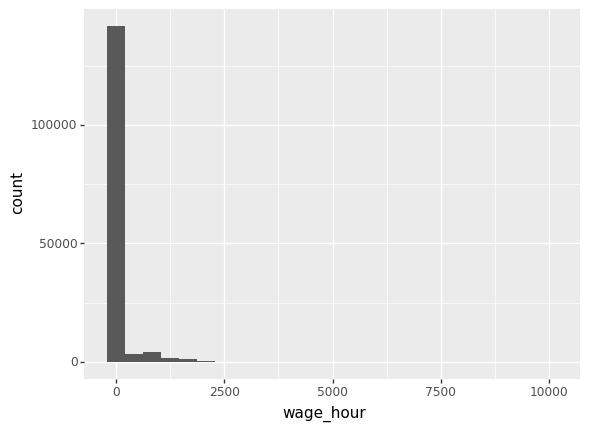

<ggplot: (135577293858)>

In [843]:
(
    ggplot(learn) + 
    aes(x = 'wage_hour') + 
    geom_histogram(bins = 25)
)

For the dependent variable, we convert it to a binary dummy variable, taking a value of zero if annual income < 50k, and 1 otherwise. 

In [844]:
learn['dep_var_binary'] = np.where(learn.dep_var == "-50000", 0, 1)

test['dep_var_binary'] = np.where(test.dep_var == "-50000", 0, 1)

In [845]:
learn['from_learn'] = 'from_learn'
test['from_test'] = 'from_test'

# Exploratory Data Analysis

We combine the training and testing datasets into 1 for the EDA portion, as the dependent variable is present in both datasets. 

In [846]:
merged = pd.concat([learn, test])

7.36% of the values in the dependent variable (annual income) are above the threshold of $50k. 

In [847]:
100*(merged.dep_var.value_counts()[1]/ (merged.dep_var.value_counts()[1] + merged.dep_var.value_counts()[0]))

7.368939481199334

Make histogram plots for all variables in the dataset.

In [848]:
# First, plot continuous variables
cont_vars = ['age', 'cap_loss', 'cap_gains', 'wage_hour', 'dividends', 'weeks_worked', 'num persons worked for employer']

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 95'. Pick better value with 'binwidth'.


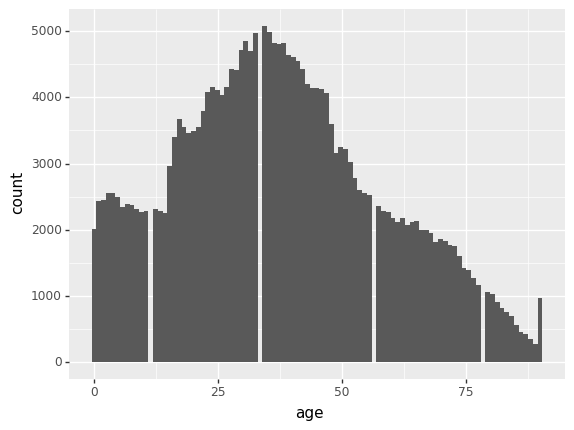

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 502'. Pick better value with 'binwidth'.


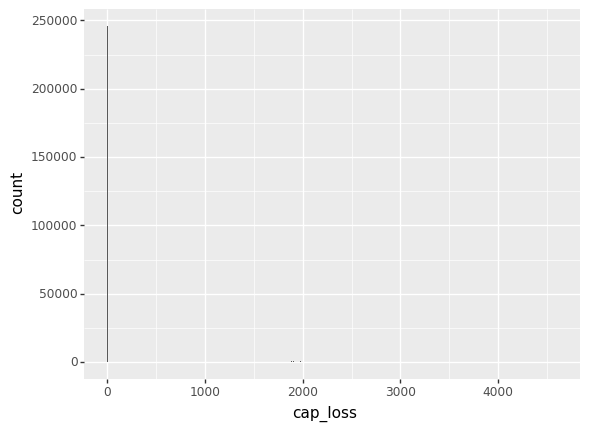

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 502'. Pick better value with 'binwidth'.


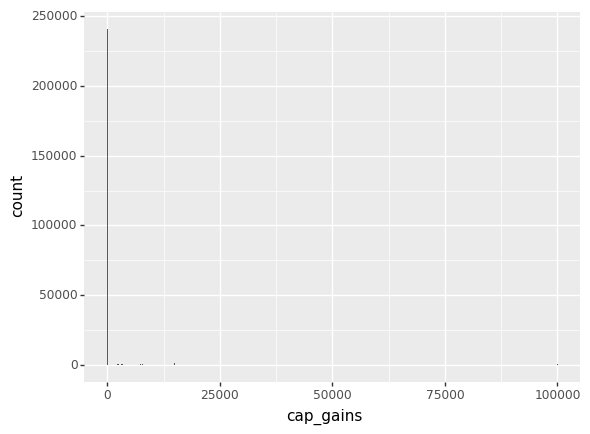

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 502'. Pick better value with 'binwidth'.


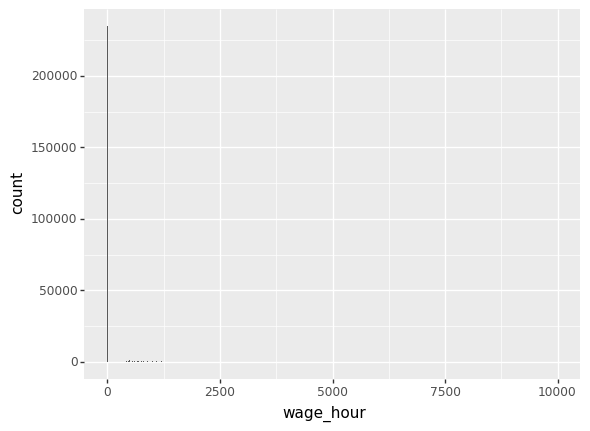

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 502'. Pick better value with 'binwidth'.


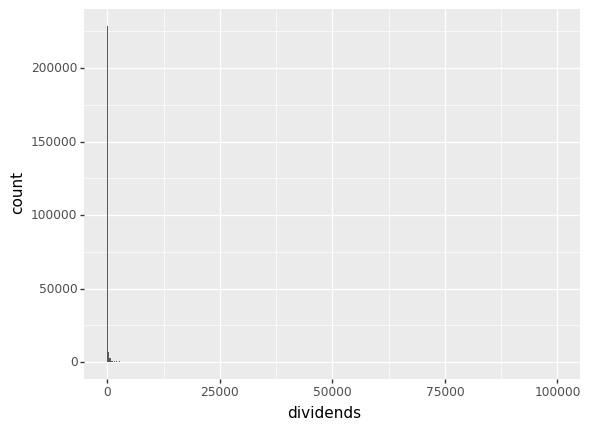

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


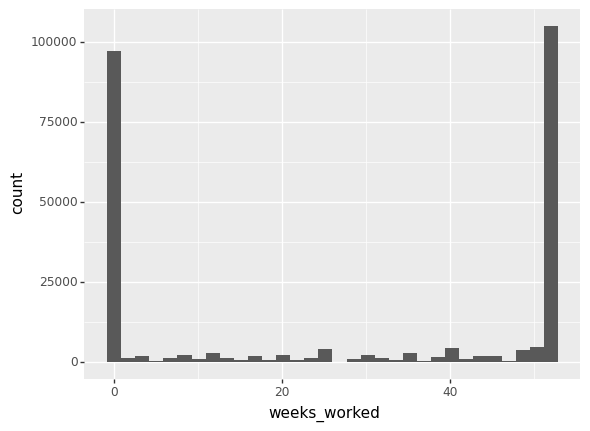

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.


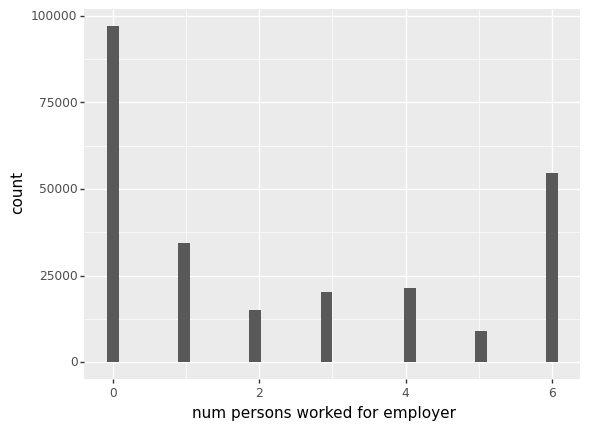

In [849]:
for i in cont_vars:
    print(
        ggplot(merged) + 
        aes(x = i) + 
        geom_histogram()
    )

Age seems to follow a normal distribution, and does not need to be transformed or converted to a categorical feature. All other continuous features might perform better if they were converted into categorical features. 

We split weeks worked into 3 categories: 0 weeks, 1 - 49 weeks, and >= 50 weeks (based on the distribution plot)

In [850]:
merged['weeks_worked_binary'] = np.where(merged['weeks_worked'] == 0, 0, np.where(merged['weeks_worked'] < 50, 1, 2 ))

In [851]:
income_weeks = merged[['weeks_worked_binary', 'dep_var_binary']]
income_weeks['id'] = income_weeks.index

C:\Users\mk255125\AppData\Local\Temp\ipykernel_25524\4104768248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [852]:
income_weeks

,weeks_worked_binary,dep_var_binary,id
0,0,0,0
1,2,0,1
2,0,0,2
3,0,0,3
4,0,0,4
...,...,...,...
99756,0,0,99756
99758,2,0,99758
99759,2,0,99759
99760,2,0,99760


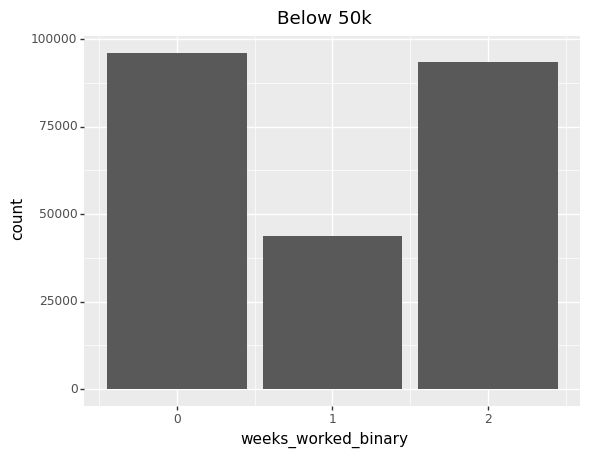

<ggplot: (135454718681)>

In [853]:
(
    ggplot(income_weeks[income_weeks['dep_var_binary'] == 0]) + 
    aes(x = 'weeks_worked_binary') +
    geom_bar() + 
    ggtitle('Below 50k')
)

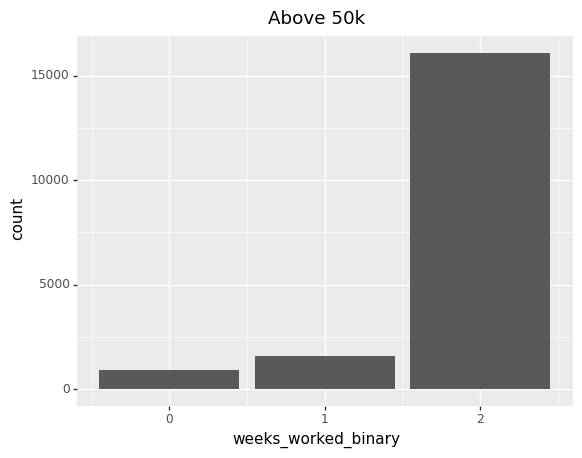

<ggplot: (135446897402)>

In [854]:
(
    ggplot(income_weeks[income_weeks['dep_var_binary'] == 1]) + 
    aes(x = 'weeks_worked_binary') +
    geom_bar() + 
    ggtitle('Above 50k')
)

For both income levels, we plot the weeks worked to see how number of weeks work correspond to annual income. From the two bar plots, we can see that for high income earners, most of them are in the high weeks worked category, whereas the low income individuals have a mixed distribution of weeks worked.  

Next, we convert the wage per hour, cap gains variables to categorical features. 

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 169'. Pick better value with 'binwidth'.


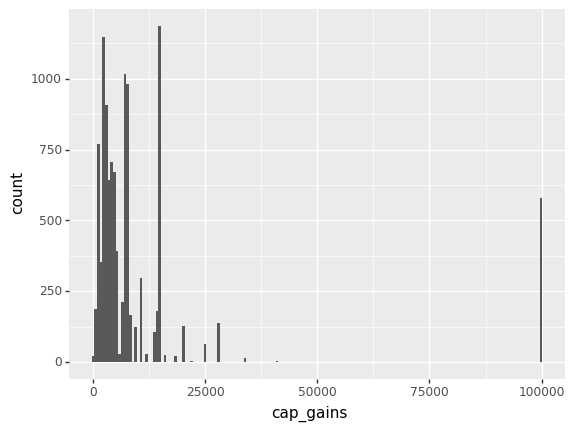

<ggplot: (135332755059)>

In [855]:
(
    ggplot(merged[merged.cap_gains != 0]) + 
    aes(x = 'cap_gains') + 
    geom_histogram()
)

We drop the outliers (above 15000 in cap gains), and choose 5000 in capital gains as the cutoff point to make our binary dependent variable.

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


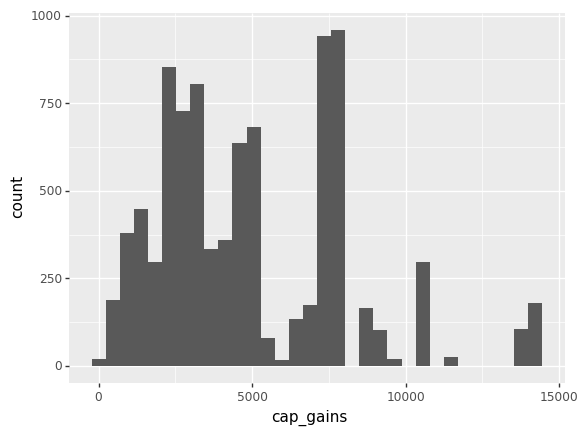

<ggplot: (135316663748)>

In [856]:
(
    ggplot(merged[(merged.cap_gains < 15000) & (merged.cap_gains != 0)]) + 
    aes(x = 'cap_gains') + geom_histogram()
)

Repeat the process for wage per hour.

C:\Users\mk255125\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 207'. Pick better value with 'binwidth'.


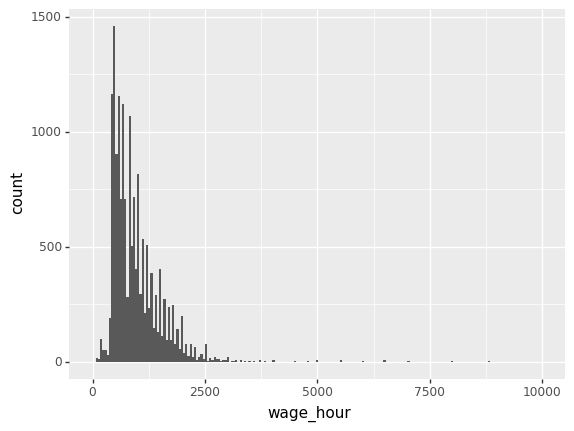

<ggplot: (135325471290)>

In [857]:
(
    ggplot(merged[merged.wage_hour != 0]) + 
    aes(x = 'wage_hour') + 
    geom_histogram()
)

In [858]:
learn.wage_hour.value_counts().sort_index()

0       141593
20           1
70           1
75           2
100         11
         ...  
9000         1
9400         2
9800         2
9916         1
9999         1
Name: wage_hour, Length: 1240, dtype: int64

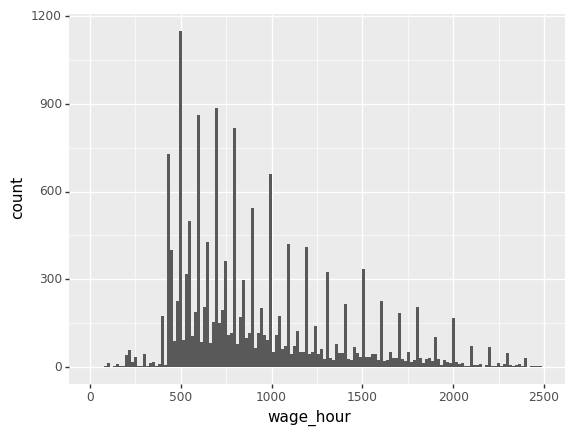

<ggplot: (135577388599)>

In [859]:
(
    ggplot(merged[(merged.wage_hour < 2500) & (merged.wage_hour > 0)]) + 
    aes(x = 'wage_hour') + 
    geom_histogram(bins = 150)
)

We consider wages above 700 as one category, and below as another category

In [860]:
merged['cap_gains_binary'] = np.where(merged['cap_gains'] > 5000, 1, 0)
merged['wage_hour_binary'] = np.where(merged['wage_hour'] > 700, 1, 0)

Plot income with wage and capital gains as binary variables.

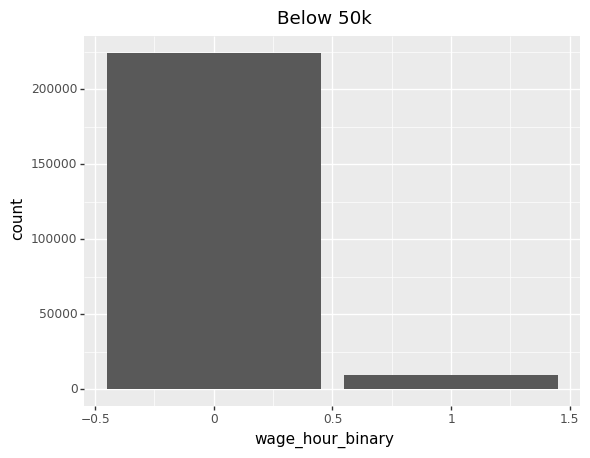

<ggplot: (135577399336)>

In [861]:
(
    ggplot(merged[merged['dep_var_binary'] == 0]) + 
    aes(x = 'wage_hour_binary') + 
    geom_bar() + 
    ggtitle('Below 50k')
)

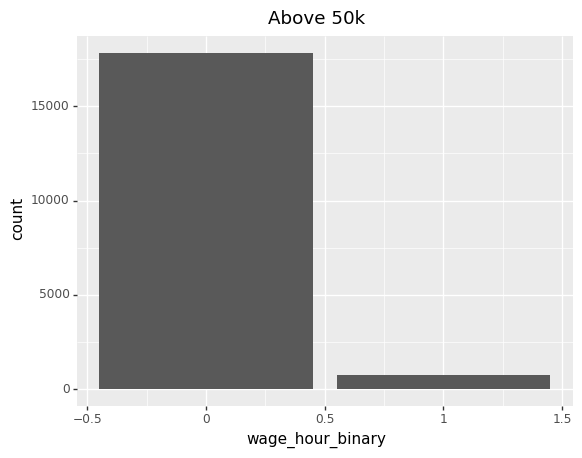

<ggplot: (135644847192)>

In [862]:
(
    ggplot(merged[merged['dep_var_binary'] == 1]) + 
    aes(x = 'wage_hour_binary') + 
    geom_bar() + 
    ggtitle('Above 50k')
)

Our wage categorization does not help us to determine whether high income individuals have high wages per hour, even though it is a fairly logical conclusion to make. 

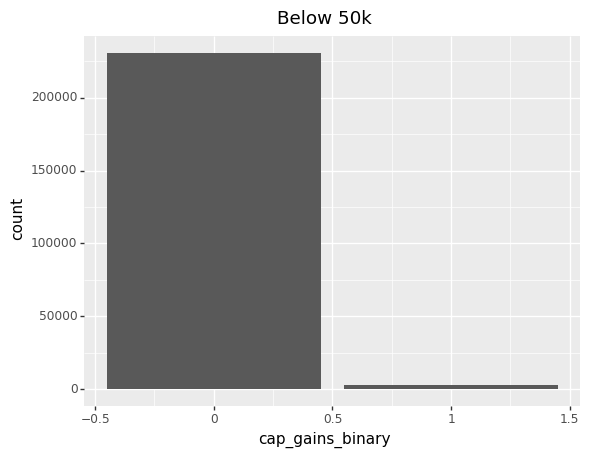

<ggplot: (135577535603)>

In [863]:
(
    ggplot(merged[merged['dep_var_binary'] == 0]) + 
    aes(x = 'cap_gains_binary') + 
    geom_bar() + 
    ggtitle('Below 50k')
)

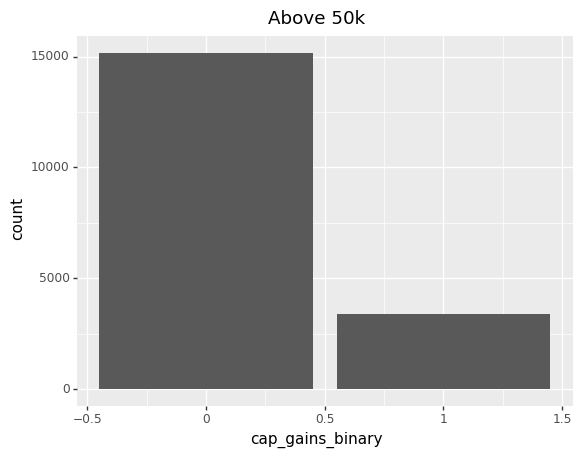

<ggplot: (135538769535)>

In [864]:
(
    ggplot(merged[merged['dep_var_binary'] == 1]) + 
    aes(x = 'cap_gains_binary') + 
    geom_bar() + 
    ggtitle('Above 50k')
)

However, with capital gains, we see that high income individuals seem to have higher capital gains compared to low income individuals. 

Additionally, we check if income is associated with company size (num persons employer). We convert it from a continuous to a categorical variable by using the associated questionnaire. 

In [865]:
merged['num persons worked for employer'].value_counts()

0    96992
6    54586
1    34526
4    21387
3    20209
2    15126
5     8947
Name: num persons worked for employer, dtype: int64

In [866]:
merged['num_worked_employer_cat'] = np.where(merged['num persons worked for employer'] == 0, 'Not in universe',
                                        np.where(merged['num persons worked for employer'] == 1, '< 10', 
                                        np.where(merged['num persons worked for employer'] == 2, '10-24',
                                        np.where(merged['num persons worked for employer'] == 3, '25-99',
                                        np.where(merged['num persons worked for employer'] == 4, '100-499',
                                        np.where(merged['num persons worked for employer'] == 5, '500-999', '1000+')))))
)

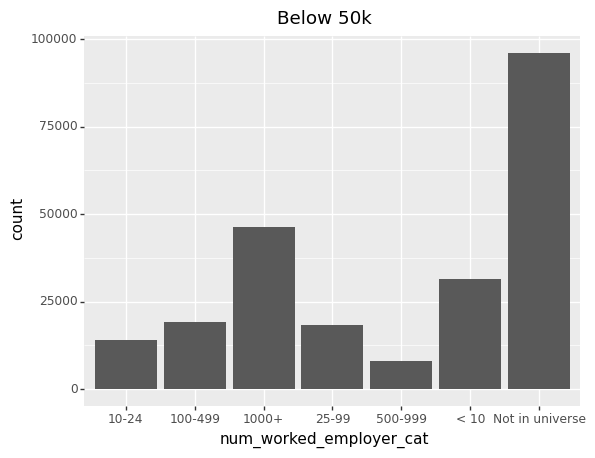

<ggplot: (135524441420)>

In [867]:
# Plot this variable across high and low income groups
(
    ggplot(merged[merged['dep_var_binary'] == 0]) + 
    aes(x = 'num_worked_employer_cat') + 
    geom_bar() + 
    ggtitle('Below 50k')
)

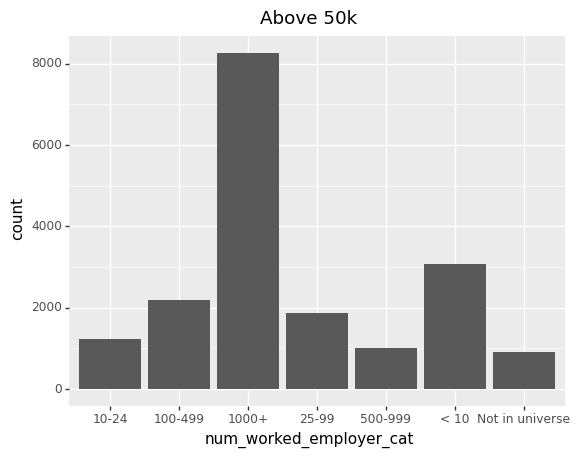

<ggplot: (135316797609)>

In [868]:
(
    ggplot(merged[merged['dep_var_binary'] == 1]) + 
    aes(x = 'num_worked_employer_cat') + 
    geom_bar() + 
    ggtitle('Above 50k')
)

There seems to be a clear indication that people with high annual incomes work in large companies (> 1000 employees).

# Classification Models

In [869]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


We use a number of techniques and compute the percentage accuracy between the predicted values and actual values. We split the training data into test and train sets, and compare the models to the validation dataset, which is provided as part of the assessment.

We convert the continuous variables to log, so we can standardize the data. 

In [870]:
cont_vars = ['cap_gains', 'cap_loss', 'wage_hour', 'dividends']
merged[cont_vars] = merged[cont_vars] + 1
merged[cont_vars] = np.log(merged[cont_vars])

In [871]:
train = merged[merged['from_learn'] == 'from_learn']
test = merged[merged['from_test'] == 'from_test']

In [872]:
X_train = train.drop(['from_test', 'from_learn', 'dep_var_binary', 'dep_var', 'weight'],axis=1)
y_train = train['dep_var_binary'].values
X_test  = test.drop(['from_test', 'from_learn', 'dep_var_binary', 'dep_var', 'weight'],axis=1)
y_test  = test['dep_var_binary'].values

In [873]:
object_cols = X_train.select_dtypes(include='object').columns
dummies_train = pd.get_dummies(X_train[object_cols])
dummies_test = pd.get_dummies(X_test[object_cols])
X_train = pd.concat([X_train, dummies_train], axis=1)
X_test = pd.concat([X_test, dummies_test], axis = 1)
object_cols = object_cols[:-1]
object_cols = X_train.select_dtypes(include='object').columns
X_train = X_train.drop(object_cols, axis=1)
X_test = X_test.drop(object_cols, axis=1)
X_train.drop('detailed_hh_status_ Grandchild <18 ever marr not in subfamily', axis = 1, inplace=True)

In [874]:
model_logistic_1 = LogisticRegression(class_weight=None,random_state=42, solver='liblinear')
model_logistic_1.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [875]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

In [876]:
y_pred = model_logistic_1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)
print("AUC-PR:", auc_pr)

Accuracy: 0.9512631727988026
Precision: 0.6972582972582972
Recall: 0.39055932751374073
F1 score: 0.5006735053362347
AUC-ROC: 0.9446694127148236
AUC-PR: 0.6073534725920378


As we have a much smaller number of 1's (high income individuals) in our data, we balance the data using weights.

In [877]:
model_logistic_2 = LogisticRegression(class_weight='balanced', random_state=42,solver='liblinear')
model_logistic_2.fit(X_train, y_train)
y_pred = model_logistic_2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)
print("AUC-PR:", auc_pr)


Accuracy: 0.876302109670503
Precision: 0.31889268380370306
Recall: 0.8603297769156159
F1 score: 0.4653114754098361
AUC-ROC: 0.9446694127148236
AUC-PR: 0.6073534725920378


# LASSO

We can improve the model by using L1 regularization to implement a LASSO (Least Absolute Squares Shrinkage Operator) to find an optimal model that uses only the most important features.

In [878]:
lasso_1 = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=42)
lasso_1.fit(X_train, y_train)

y_pred = lasso_1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, model_logistic_1.predict_proba(X_test)[:,1])

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)
print("AUC-PR:", auc_pr)


Accuracy: 0.9511923784866199
Precision: 0.6956271576524741
Recall: 0.39088263821532493
F1 score: 0.5005174912026497
AUC-ROC: 0.9446694127148236
AUC-PR: 0.6073534725920378


In [879]:
feature_importance = abs(lasso_1.coef_[0])

# create a dataframe with the feature names and their importance values
features = X_train.columns
importance = pd.DataFrame(list(zip(features, feature_importance)), columns=['Feature', 'Importance'])
importance = importance.sort_values(by='Importance', ascending=False)


In [880]:
importance.head(n = 15)

,Feature,Importance
39,education_ Prof school degree (MD DDS DVM LLB JD),2.334782
35,education_ Doctorate degree(PhD EdD),2.332989
13,cap_gains_binary,2.106301
52,maj_industry_ Armed Forces,2.054268
18,class_worker_ Not in universe,2.010782
77,maj_occupation_ Executive admin and managerial,1.770902
78,maj_occupation_ Farming forestry and fishing,1.629000
38,education_ Masters degree(MA MS MEng MEd MSW MBA),1.521699
128,tax_filer_status_ Nonfiler,1.494040
394,self_birthplace_ Scotland,1.482844


There are some conclusions that are valid from these results, while some results do not make total sense. However, it can be concluded that education (having a professional degree), capital gains, being in an executive occupation, would lead to higher incomes on average. However, age (which had shown in the EDA to be associated with income) did not show up in the results of the logistic regression model. Therefore, some additional tuning of the model, or a different algorithm altogether may be required.

# Conclusion

The purpose of this exercise was to find the association between the given variables and income, therefore it was an exploratory exercise and not one where prediction accuracy was the main goal. Since explainability and model inference are important in EDA, more sophisticated but harder to interpret algorithms, such as SVMs and neural nets, are avoided.

The data had some duplicates which needed to be removed. 

There were also several variables which had a high number of zeroes: we converted those variables to binary features.

The dependent variable suffered from class imbalance, so we used weights during the application of the logistic regression. 

The most important features were: education, type of occupation, industry, capital gains, size of company and weeks worked.

We could improve our overall analysis by using a wider array of algorithms (such as k-means, nearest neighbor matching or random forest) and by testing for multicollinearity, heteroskedasticity, and endogeneity issues in the models.